In [ ]:
import pandas as pd
from typing import Tuple, List, Dict
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Linear Regression


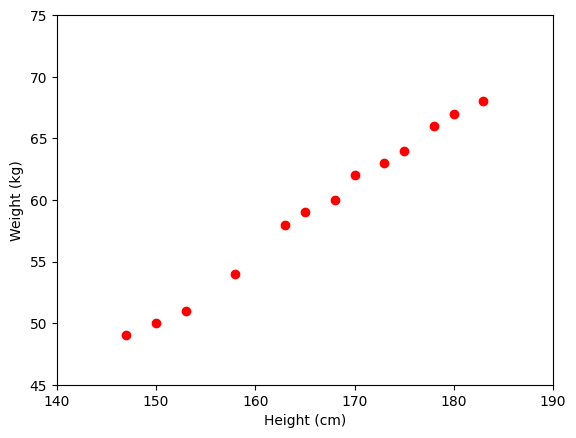

In [ ]:
# height (cm)
X = np.array(
    [[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
# weight (kg)
y = np.array([[49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T
# Visualize data
plt.plot(X, y, 'ro')
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()


w =  [[-33.73541021]
 [  0.55920496]]
-33.735410206296365 0.5592049619425978


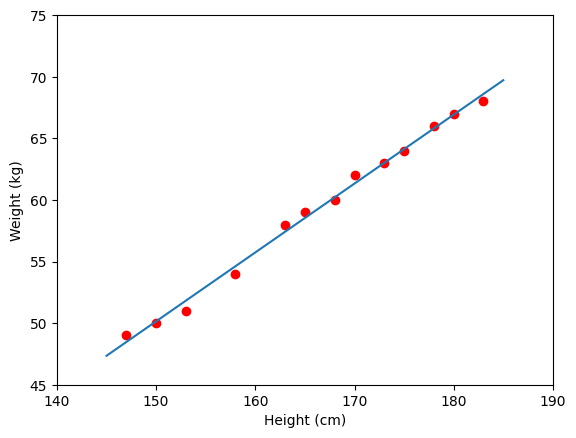

In [ ]:
# Building Xbar
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis=1)

# Calculating weights of the fitting line
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)
# Preparing the fitting line
w_0 = w[0][0]
w_1 = w[1][0]

x0 = np.linspace(145, 185, 2, endpoint=True)
y0 = w_0 + w_1*x0

print(w_0, w_1)
# Drawing the fitting line
plt.plot(X.T, y.T, 'ro')     # data
plt.plot(x0, y0)               # the fitting line
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()


Nghiệm tìm được bằng scikit-learn  :  [[-33.73541021   0.55920496]]
-33.735410205808094 0.5592049619396694


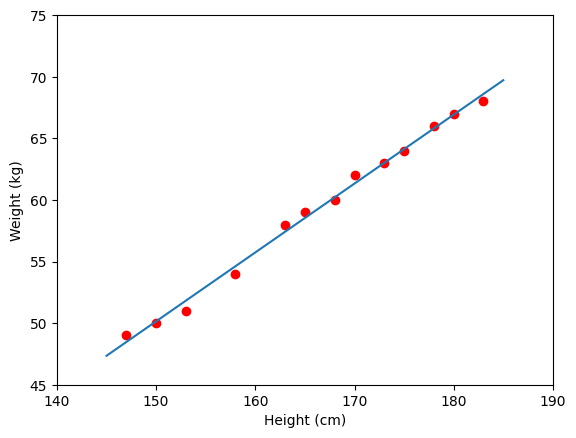

In [ ]:
from sklearn import datasets, linear_model

# fit the model by Linear Regression
# fit_intercept = False for calculating the bias
regr = linear_model.LinearRegression(fit_intercept=False)
regr.fit(Xbar, y)

print(u'Nghiệm tìm được bằng scikit-learn  : ', regr.coef_)
w_0 = regr.coef_[0][0]
w_1 = regr.coef_[0][1]
print(w_0, w_1)
x0 = np.linspace(145, 185, 2, endpoint=True)
y0 = w_0 + w_1*x0

# Drawing the fitting line
plt.plot(X.T, y.T, 'ro')     # data
plt.plot(x0, y0)               # the fitting line
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

w =  [[22.21867545]
 [ 0.23775985]]


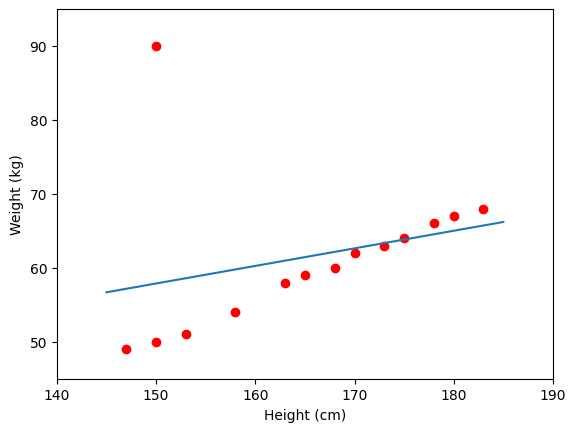

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# height (cm)
X = np.array([[147, 150, 153, 158, 163, 165, 168,
             170, 173, 175, 178, 180, 183, 150]]).T
# weight (kg)
y = np.array([[49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68, 90]]).T

# Building Xbar
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis=1)

# Calculating weights of the fitting line
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)
# Preparing the fitting line
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(145, 185, 2, endpoint=True)
y0 = w_0 + w_1*x0

# Drawing the fitting line
plt.plot(X, y, 'ro')     # data
plt.plot(x0, y0)               # the fitting line
plt.axis([140, 190, 45, 95])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()


## logistic regression


### preprocess data

In [ ]:
df_train = pd.read_csv('./Train_samsung.csv')
df_test = pd.read_csv("./Test_samsung_noclass.csv")
df_train.dtypes


X1        object
X2        object
X3        object
X4        object
X5        object
X6         int64
X7       float64
X8       float64
X9       float64
X10      float64
X11       object
Class     object
dtype: object

In [ ]:
def print_df(dataframe: pd.DataFrame):
    print(tabulate(dataframe, headers='keys', tablefmt='psql'))


In [ ]:
print_df(dataframe=df_train)


+-----+--------+------+------+--------------+------+-------+----------+------+------+-------+-----------+---------+
|     | X1     | X2   | X3   | X4           | X5   |    X6 |       X7 |   X8 |   X9 |   X10 | X11       | Class   |
|-----+--------+------+------+--------------+------+-------+----------+------+------+-------+-----------+---------|
|   0 | Male   | Yes  | 0    | Graduate     | No   |  6000 |  2250    |  265 |  360 |   nan | Semiurban | N       |
|   1 | Male   | Yes  | 0    | Graduate     | No   |  2958 |  2900    |  131 |  360 |     1 | Semiurban | Y       |
|   2 | Male   | Yes  | 2    | Graduate     | No   |  6250 |  1695    |  210 |  360 |     1 | Semiurban | Y       |
|   3 | Male   | Yes  | 0    | Graduate     | No   |  2083 |  3150    |  128 |  360 |     1 | Semiurban | Y       |
|   4 | Male   | No   | 0    | Graduate     | No   |  4166 |     0    |   98 |  360 |     0 | Semiurban | N       |
|   5 | Male   | Yes  | 0    | Graduate     | No   | 19730 |  5266    | 

In [ ]:
def check_Nan_values(df: pd.DataFrame):
    for key in df.keys():
        if df[key].isnull().sum() > 0:
            print(key, df[key].isnull().sum())


In [ ]:
def numberic(dataframe: pd.DataFrame):
    df = dataframe.copy()
    for key in df.keys():
        if df[key].dtype == object:
            df[key] = LabelEncoder().fit_transform(df[key])

    return df


In [ ]:
def normailize(dataframe: pd.DataFrame):
    df = dataframe.copy()
    for key in df.keys():
        if df[key].dtype != object:
            min = df[key].min()
            max = df[key].max()
            df[key] = (df[key] - min)/(max-min)
            df[key] = df[key].round(decimals=4)
    return df


In [ ]:
check_Nan_values(df=df_train)


X1 12
X2 1
X3 11
X5 24
X8 16
X9 12
X10 40


In [ ]:
df_train = normailize(dataframe=df_train)


In [ ]:
df_train = numberic(dataframe=df_train)
print_df(dataframe=df_train)


+-----+------+------+------+------+------+--------+--------+----------+----------+-------+-------+---------+
|     |   X1 |   X2 |   X3 |   X4 |   X5 |     X6 |     X7 |       X8 |       X9 |   X10 |   X11 |   Class |
|-----+------+------+------+------+------+--------+--------+----------+----------+-------+-------+---------|
|   0 |    1 |    1 |    0 |    0 |    0 | 0.0724 | 0.054  |   0.3631 |   0.7436 |   nan |     1 |       0 |
|   1 |    1 |    1 |    0 |    0 |    0 | 0.0347 | 0.0696 |   0.1669 |   0.7436 |     1 |     1 |       1 |
|   2 |    1 |    1 |    2 |    0 |    0 | 0.0754 | 0.0407 |   0.2826 |   0.7436 |     1 |     1 |       1 |
|   3 |    1 |    1 |    0 |    0 |    0 | 0.0239 | 0.0756 |   0.1625 |   0.7436 |     1 |     1 |       1 |
|   4 |    1 |    0 |    0 |    0 |    0 | 0.0497 | 0      |   0.1186 |   0.7436 |     0 |     1 |       0 |
|   5 |    1 |    1 |    0 |    0 |    0 | 0.2422 | 0.1264 |   0.8097 |   0.7436 |     1 |     0 |       0 |
|   6 |    1 |    1

In [ ]:
data_train = df_train.copy()


In [ ]:
data_train.describe()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Class
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,475.000000,479.000000,451.000000,491.00000,491.000000
mean,0.835031,0.637475,0.818737,0.221996,0.234216,0.066207,0.040236,0.192859,0.701473,0.844789,1.03666,0.696538
std,0.432453,0.485442,1.112882,0.416012,0.526957,0.073383,0.076263,0.128434,0.144674,0.362507,0.78160,0.460222
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.034250,0.000000,0.121500,0.743600,1.000000,0.00000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.046400,0.027000,0.164000,0.743600,1.000000,1.00000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,0.071600,0.056000,0.221100,0.743600,1.000000,2.00000,1.000000
max,2.000000,2.000000,4.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.00000,1.000000


In [ ]:
def iqr_outliers(dataframe: pd.DataFrame):
    df = dataframe.copy()
    for key in df.keys():
        if key != 'Class':
            q1 = df[key].quantile(0.25)
            q3 = df[key].quantile(0.75)
            iqr = q3-q1
            Lower_tail = q1 - 1.5 * iqr
            Upper_tail = q3 + 1.5 * iqr
            if Lower_tail != Upper_tail:
                df = df.drop(df[df[key] > Upper_tail].index)
                df = df.drop(df[df[key] < Lower_tail].index)
            print(key)
            print(f"Lower_tail: {Lower_tail}")
            print(f"Upper_tail: {Upper_tail}")
            print("\n")
    return df


In [ ]:
data_train = iqr_outliers(dataframe=data_train)


X1
Lower_tail: 1.0
Upper_tail: 1.0


X2
Lower_tail: -1.5
Upper_tail: 2.5


X3
Lower_tail: -3.0
Upper_tail: 5.0


X4
Lower_tail: 0.0
Upper_tail: 0.0


X5
Lower_tail: 0.0
Upper_tail: 0.0


X6
Lower_tail: -0.02177499999999999
Upper_tail: 0.127625


X7
Lower_tail: -0.084975
Upper_tail: 0.141625


X8
Lower_tail: 0.0007499999999999729
Upper_tail: 0.32275000000000004


X9
Lower_tail: 0.7436
Upper_tail: 0.7436


X10
Lower_tail: 1.0
Upper_tail: 1.0


X11
Lower_tail: -3.0
Upper_tail: 5.0




In [ ]:
print_df(data_train)


+-----+------+------+------+------+------+--------+--------+----------+----------+-------+-------+---------+
|     |   X1 |   X2 |   X3 |   X4 |   X5 |     X6 |     X7 |       X8 |       X9 |   X10 |   X11 |   Class |
|-----+------+------+------+------+------+--------+--------+----------+----------+-------+-------+---------|
|   1 |    1 |    1 |    0 |    0 |    0 | 0.0347 | 0.0696 |   0.1669 |   0.7436 |     1 |     1 |       1 |
|   2 |    1 |    1 |    2 |    0 |    0 | 0.0754 | 0.0407 |   0.2826 |   0.7436 |     1 |     1 |       1 |
|   3 |    1 |    1 |    0 |    0 |    0 | 0.0239 | 0.0756 |   0.1625 |   0.7436 |     1 |     1 |       1 |
|   4 |    1 |    0 |    0 |    0 |    0 | 0.0497 | 0      |   0.1186 |   0.7436 |     0 |     1 |       0 |
|   6 |    1 |    1 |    3 |    1 |    1 | 0.0394 | 0.052  |   0.1654 |   0.7436 |   nan |     1 |       1 |
|   7 |    2 |    1 |    2 |    1 |    0 | 0.0398 | 0.046  |   0.1391 |   0.7436 |     0 |     0 |       0 |
|   8 |    0 |    1

In [ ]:
for key in data_train.keys():
    display(data_train[key].agg(['mean', 'median', 'std'], axis='rows'))


mean      0.821078
median    1.000000
std       0.431951
Name: X1, dtype: float64

mean      0.627451
median    1.000000
std       0.489126
Name: X2, dtype: float64

mean      0.784314
median    0.000000
std       1.105069
Name: X3, dtype: float64

mean      0.259804
median    0.000000
std       0.439065
Name: X4, dtype: float64

mean      0.218137
median    0.000000
std       0.523609
Name: X5, dtype: float64

mean      0.048164
median    0.042600
std       0.022478
Name: X6, dtype: float64

mean      0.031266
median    0.030800
std       0.033464
Name: X7, dtype: float64

mean      0.154759
median    0.153700
std       0.057946
Name: X8, dtype: float64

mean      0.700089
median    0.743600
std       0.149596
Name: X9, dtype: float64

mean      0.840426
median    1.000000
std       0.366699
Name: X10, dtype: float64

mean      1.009804
median    1.000000
std       0.780538
Name: X11, dtype: float64

mean      0.708333
median    1.000000
std       0.455088
Name: Class, dtype: float64

In [ ]:
def replace_Nan_data(dataframe: pd.DataFrame) -> pd.DataFrame:
    df = dataframe.copy()
    for key in df.keys():
        if df[key].isnull().sum() > 0:
            df[key].fillna(round(df[key].median()), inplace=True)
    return df


In [ ]:
data_train = replace_Nan_data(dataframe=data_train)
print_df(dataframe=data_train)


+-----+------+------+------+------+------+--------+--------+--------+--------+-------+-------+---------+
|     |   X1 |   X2 |   X3 |   X4 |   X5 |     X6 |     X7 |     X8 |     X9 |   X10 |   X11 |   Class |
|-----+------+------+------+------+------+--------+--------+--------+--------+-------+-------+---------|
|   1 |    1 |    1 |    0 |    0 |    0 | 0.0347 | 0.0696 | 0.1669 | 0.7436 |     1 |     1 |       1 |
|   2 |    1 |    1 |    2 |    0 |    0 | 0.0754 | 0.0407 | 0.2826 | 0.7436 |     1 |     1 |       1 |
|   3 |    1 |    1 |    0 |    0 |    0 | 0.0239 | 0.0756 | 0.1625 | 0.7436 |     1 |     1 |       1 |
|   4 |    1 |    0 |    0 |    0 |    0 | 0.0497 | 0      | 0.1186 | 0.7436 |     0 |     1 |       0 |
|   6 |    1 |    1 |    3 |    1 |    1 | 0.0394 | 0.052  | 0.1654 | 0.7436 |     1 |     1 |       1 |
|   7 |    2 |    1 |    2 |    1 |    0 | 0.0398 | 0.046  | 0.1391 | 0.7436 |     0 |     0 |       0 |
|   8 |    0 |    1 |    0 |    0 |    0 | 0.043  | 0  

df_train['X7'] = df_train['X7'].replace(
    to_replace=0, value=df_train['X7'].median())
print_df(df_train)


In [ ]:
data_train.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Class
count,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,0.821078,0.627451,0.784314,0.259804,0.218137,0.048164,0.031266,0.149069,0.708910,0.852941,1.009804,0.708333
std,0.431951,0.489126,1.105069,0.439065,0.523609,0.022478,0.033464,0.063908,0.155862,0.354599,0.780538,0.455088
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.032275,0.000000,0.115700,0.743600,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.042600,0.030800,0.150800,0.743600,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,1.000000,0.000000,0.058300,0.053000,0.185900,0.743600,1.000000,2.000000,1.000000
max,2.000000,2.000000,4.000000,1.000000,2.000000,0.127000,0.136800,0.311900,1.000000,1.000000,2.000000,1.000000


In [ ]:
check_Nan_values(data_train)


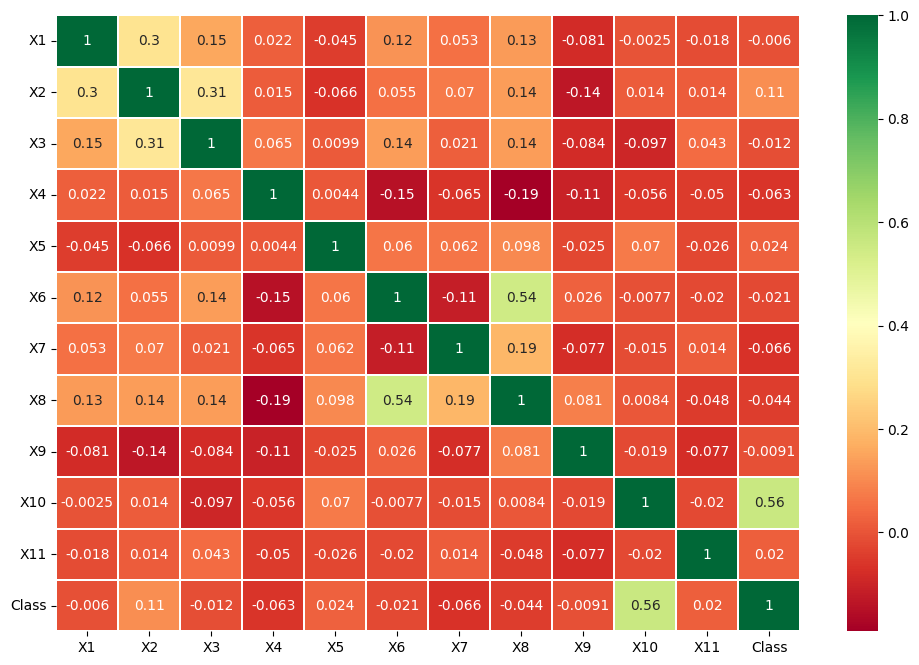

In [ ]:
sns.heatmap(df_train.corr(), annot=True, cmap='RdYlGn',
            linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()


### Classification

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np


In [ ]:
labels_train = data_train['Class']
data_train = data_train.drop(['Class'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    np.array(data_train), np.array(labels_train), test_size=0.15, random_state=1)


In [ ]:

print(len(y_train), (y_train == 1).sum())
print(len(y_test), (y_test == 1).sum())


346 240
62 49


              precision    recall  f1-score   support

           0       0.86      0.46      0.60        13
           1       0.87      0.98      0.92        49

    accuracy                           0.87        62
   macro avg       0.86      0.72      0.76        62
weighted avg       0.87      0.87      0.86        62

0.923076923076923


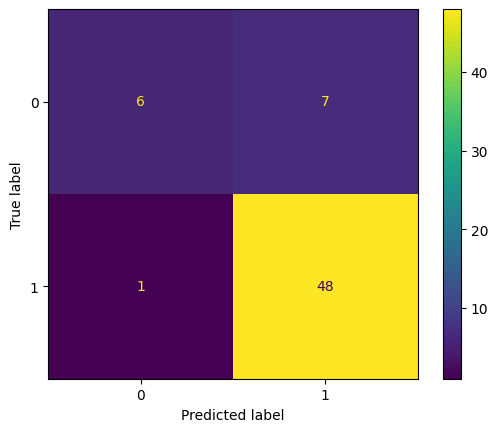

In [ ]:
lgr = LogisticRegression(C=0.1, max_iter=100000)
lgr.fit(X_train, y_train)
lgr_pred = lgr.predict(X_test)


print(classification_report(y_test, lgr_pred))
cm = confusion_matrix(y_true=y_test, y_pred=lgr_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
print(f1_score(lgr_pred, y_test))


## Cross validation


###

![](./image/grid_search_cross_validation.png)


In [ ]:
logit = LogisticRegression()
standard_scaler = StandardScaler()

scoring = ['accuracy', 'f1']

pipeLine = make_pipeline(standard_scaler, logit)
kf = KFold(n_splits=5, shuffle=True, random_state=2)

cv_resutls = cross_validate(
    pipeLine, data_train, labels_train, cv=kf, n_jobs=-1, scoring=scoring)

cv_resutls


{'fit_time': array([0.00458908, 0.00367999, 0.00360274, 0.00366974, 0.0049758 ]),
 'score_time': array([0.00213242, 0.00143695, 0.00144506, 0.00153995, 0.0014863 ]),
 'test_accuracy': array([0.84146341, 0.76829268, 0.81707317, 0.81481481, 0.90123457]),
 'test_f1': array([0.90780142, 0.83185841, 0.87603306, 0.88188976, 0.94029851])}

In [ ]:
cv_resutls['test_f1'].mean()


0.8875762309225632